In [1]:
import requests
import pandas as pd
import numpy as np
import indicators as ind

In [2]:

PARAMS = {"backtest": "all"}
df = requests.get(
    "https://aipricepatterns.com/api/api/backtest", params=PARAMS)
data = df.json()['backtest']
data = pd.DataFrame(data)
data = data.set_index('Time')
data.index = pd.to_datetime(data.index)
data['hours'] = data.index.hour
data['minutes'] = data.index.minute
data['dayofweek'] = data.index.dayofweek
print(data.head(1))


                              Close  Cumsum     High  Lag  Lag_short  \
Time                                                                   
2020-11-12 01:00:00+00:00  15609.36     0.0  15640.0    0          0   

                                Low     Open  Results Rule Rule_short  Signal  \
Time                                                                            
2020-11-12 01:00:00+00:00  15600.65  15635.5      0.0   no         no       0   

                           Signal_short  Volume  hours  minutes  dayofweek  
Time                                                                        
2020-11-12 01:00:00+00:00             0     0.0      1        0          3  


In [3]:
def indicators(dataset):
    df = dataset.copy()
    columns = ['open', 'high', 'low', 'close']
    df, col = ind.rate_of_change(df, n=10)
    df, col = ind.stochastic_oscillator_d(df, n=10)
    df, col = ind.kst_oscillator(df)
    df, col = ind.standard_deviation(df, n=10)
    df, col = ind.rate_of_change(df, n=100)
    df, col = ind.stochastic_oscillator_d(df, n=100)
    df, col = ind.stochastic_oscillator_d(df, n=200)
    df, col = ind.standard_deviation(df, n=50)
    df, col = ind.standard_deviation(df, n=100)
    df, col = ind.standard_deviation(df, n=150)
    df, col = ind.standard_deviation(df, n=200)
    df, col = ind.standard_deviation(df, n=300)
    df, _ = ind.moving_average(df, n=200)
    df, _ = ind.moving_average(df, n=100)
    df, _ = ind.coppock_curve(df, 10)
    df, _ = ind.coppock_curve(df, 20)
    df, _ = ind.coppock_curve(df, 100)
    df = df.drop(columns, axis=1)
    df = df.dropna()
    return df



In [4]:
df_ind = data[['Open', 'High', 'Low', 'Close']]
df_ind.columns = ['open', 'high', 'low', 'close']
# df_ind = df_ind.rename({'open': 'Open', 'high': 'High', 'Low': 'low', 'close': 'close'})
df_ind = indicators(df_ind)

In [6]:
df_ind = pd.concat([data, df_ind], axis=1)
df_ind = df_ind.dropna()

In [10]:
print(df_ind.columns)

Index(['Close', 'Cumsum', 'High', 'Lag', 'Lag_short', 'Low', 'Open', 'Results',
       'Rule', 'Rule_short', 'Signal', 'Signal_short', 'Volume', 'hours',
       'minutes', 'dayofweek', 'Close', 'Cumsum', 'High', 'Lag', 'Lag_short',
       'Low', 'Open', 'Results', 'Rule', 'Rule_short', 'Signal',
       'Signal_short', 'Volume', 'hours', 'minutes', 'dayofweek', 'ROC_10',
       'SO%d_10', 'KST_10_15_20_30_10_10_10_15', 'STD_10', 'ROC_100',
       'SO%d_100', 'SO%d_200', 'STD_50', 'STD_100', 'STD_150', 'STD_200',
       'STD_300', 'MA_200', 'MA_100', 'Copp_10', 'Copp_20', 'Copp_100',
       'signal'],
      dtype='object')


<AxesSubplot:xlabel='Time'>

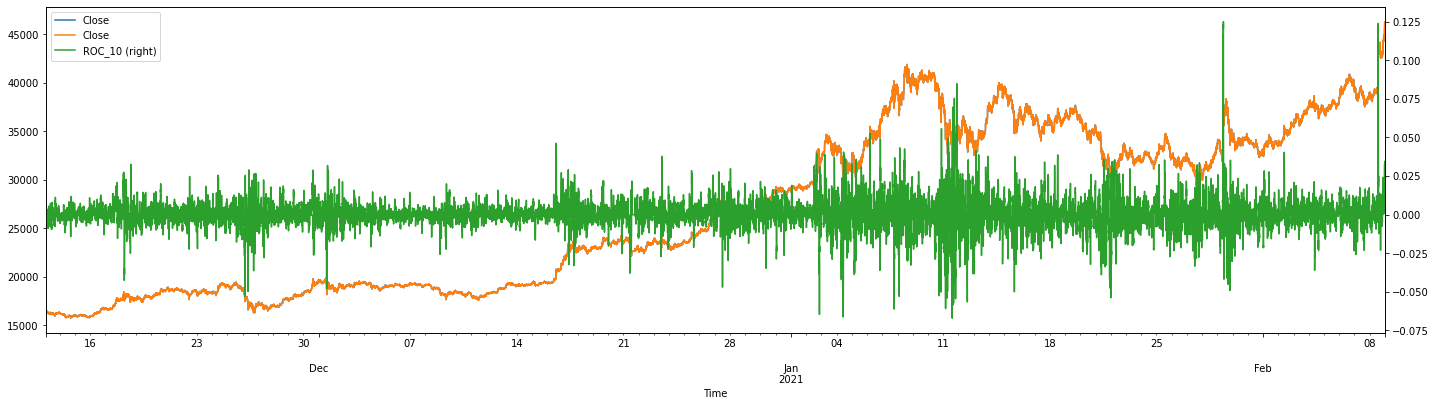

In [11]:
df_ind[['Close', 'ROC_10']].plot(secondary_y=['ROC_10'], figsize=(24, 6))

### BOX Plot

<AxesSubplot:>

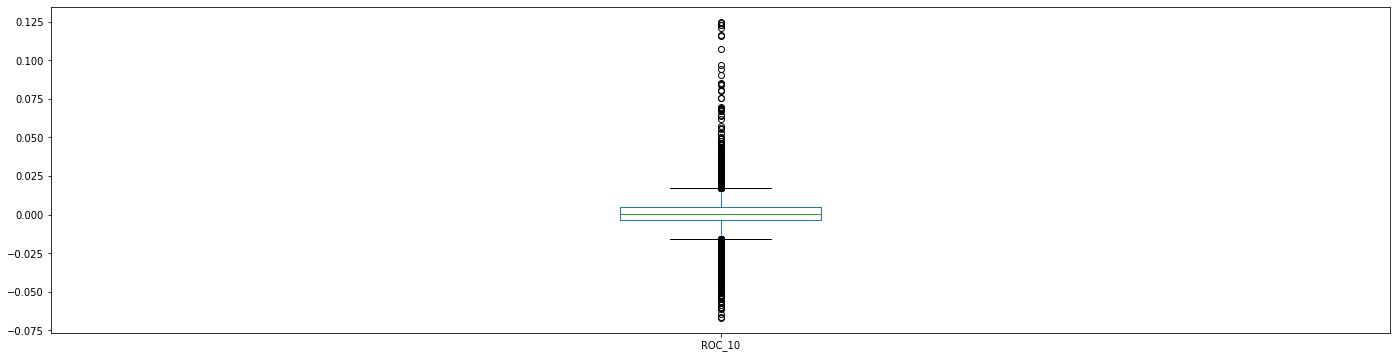

In [12]:
df_ind['ROC_10'].plot.box(figsize=(24, 6))

### Hist

<AxesSubplot:ylabel='Frequency'>

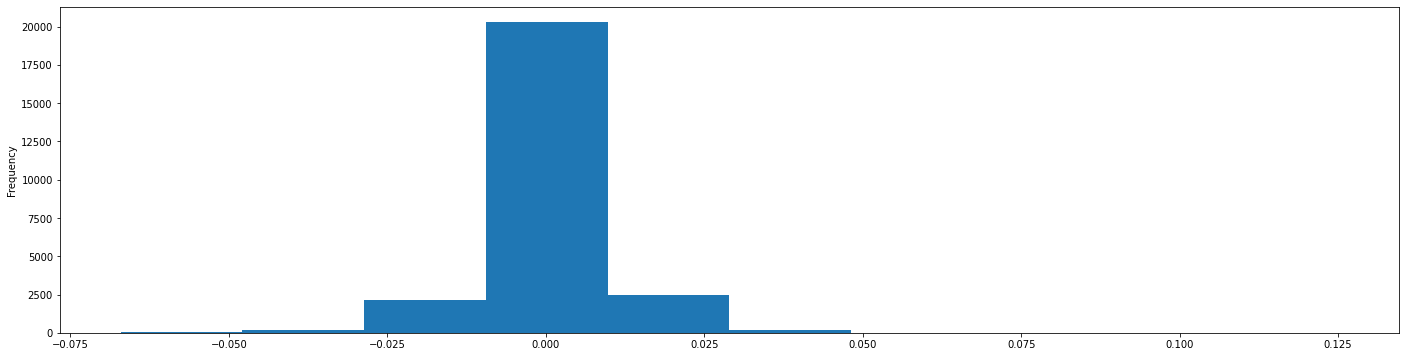

In [13]:
df_ind['ROC_10'].plot.hist(figsize=(24, 6))

<AxesSubplot:xlabel='Time'>

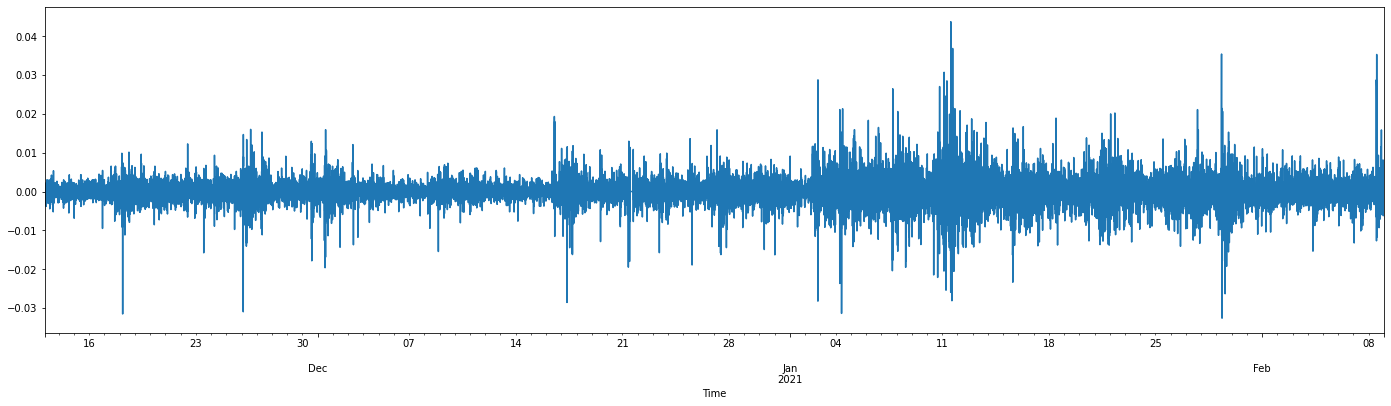

In [23]:
df_ind['Cl'] = data['Close']
df_ind.loc[:, 'y'] = df_ind['Cl'].shift(-10).pct_change()
df_ind['y'].plot(figsize=(24, 6))


### Your Work, Home Work

In [26]:
df_ind['signal'] = np.where(df_ind['ROC_10'] <= -0.025, 1, 0)

<AxesSubplot:xlabel='Time'>

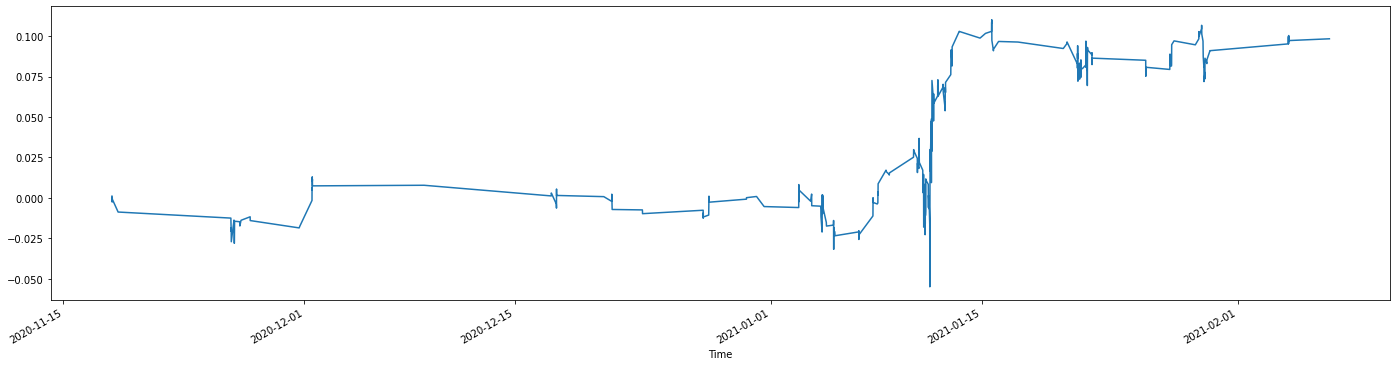

In [27]:
df_ind[df_ind['signal'] == 1]['y'].cumsum().plot(figsize=(24, 6))

In [34]:
t = df_ind.dropna()